 ## Problem  </br>
   #### Equation :  d<sup>2</sup>y/dx<sup>2</sup> - 2 x dy/dx - 2y = -4x </br></br>

   #### Boundary Conditions - </br>
      y(0) - y'(1) = 0 
      2y(1) - y'(1) = 1 
      h = 0.1, 0.5

In [61]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Any given equation is of the general form  --> d<sup>2</sup>y / dx<sup>2</sup> + A(x) dy / dx + B(x) y = C(x) </br>
Hence we have to define A(x), B(x) and C(x) for every problem

In [62]:
def A(x):
    return -2*x
def B(x):
    return -2
def C(x):
    return -4*x   

### The Thomas Algorithm solves a tri-diagonal system efficiently

In [63]:
def thomas_algo(a, b, c, d):
    n = len(d)
    c_ = [0 for i in range(n)]
    d_ = [0 for i in range(n)]
    y = [0 for i in range(n)]

    c_[0] = c[0] / (1.0 * b[0])
    d_[0] = d[0] / (1.0 * b[0])
    
    for i in range(1,n):
        c_[i] = c[i]/(b[i] - a[i]*c_[i-1])
        d_[i] = (d[i] - a[i]*d_[i-1])/(b[i] - a[i]*c_[i-1])
    
    y[n-1] = d_[n-1]
    for i in range(n-2, -1, -1):
        y[i] = d_[i] - c_[i]*y[i+1]

    return y

### Function that converts a given BVP into a tri-diagonal system and solves it using Thomas Algorithm 

In [68]:
def bvp_type_2(l, alp1, bet1, gam1, r, alp2, bet2, gam2, h):
    n = int ((r-l) / (1.0*h))
    a = [0 for i in range(n-1)]
    b = [0 for i in range(n-1)]
    c = [0 for i in range(n-1)]
    d = [0 for i in range(n-1)]

    for i in range(n-1):
        # As i starts from 0, we define x = l + (i+1)*h
        x = l+(i+1)*h             
        a[i] = (1.0/h**2) - A(x)/(2.0*h)
        b[i] = -2.0/(h**2) + B(x)
        c[i] = 1.0/(h**2) + A(x)/(2*h)
        d[i] = C(x)
        if i == 0:
            denom0 = alp1 - (1.5 * bet1 / h);
            b[i] += a[i] * (-2 * bet1 / h) / denom0;
            c[i] += a[i] * (0.5 * bet1 /h) / denom0;
            d[i] -= a[i] * (gam1 / denom0);

    denom1 = alp2 + (1.5 * bet2 / h);
    b[i] += c[i] * (2 * bet2 / h) / denom1;
    a[i] += c[i] * (-0.5 * bet2 /h) / denom1;
    d[i] -= c[i] * (gam2 / denom1); 
    
    y = thomas_algo(a, b, c, d)
    y_l =  ((-2 * bet1 / h)*y[0] + (0.5 * bet1 /h)*y[1] +gam1)/denom0;
    y_r =  ((2 * bet2 / h)*y[-1] +(-0.5 * bet2 /h)*y[-2] + gam2)/denom1;
    return [y_l]+y+[y_r]  

### The main function calls the bvp_type_2 function with the necessary input parameters and plots the result

In [69]:
def main():
    
    a = 0
    b = 1
    alp1 = 1
    bet1 = bet2 = -1
    alp2 = 2
    gam1 = 0
    gam2 = 1
    h1 = 0.1
    h2 = 0.05
    h3 = 0.005
    
    x1 = np.linspace(a,b,(b - a)/h1 +1)
    y1 = bvp_type_2(a, alp1, bet1, gam1, b, alp2, bet2, gam2, h1)
    x2 = np.linspace(a,b,(b - a)/h2 +1)
    y2 = bvp_type_2(a, alp1, bet1, gam1, b, alp2, bet2, gam2, h2)
    x3 = np.linspace(a,b,(b - a)/h3 +1)
    y3 = bvp_type_2(a, alp1, bet1, gam1, b, alp2, bet2, gam2, h3)
    plt.ylabel('y')
    plt.xlabel('x')
    p1, p2, p3 = plt.plot(x3, np.interp(x3, x1, y1), 
                          x3, np.interp(x3, x2, y2), x3, y3)
    
    plt.legend([p1, (p1, p2), (p1,p2,p3)], ["h = 0.1", "h =0.05", "h = 0.005"], loc =4)
   
    plt.show()

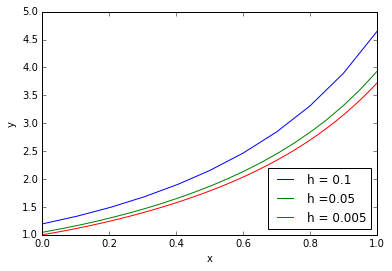

In [70]:
main()